<a href="https://colab.research.google.com/github/DJCordhose/buch-machine-learning-notebooks/blob/master/kap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kapitel 3: Datenimport und -vorbereitung

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
print(pd.__version__)

1.4.2


In [4]:
import seaborn as sns
print(sns.__version__)

0.11.2


## Zuerst laden wir den Iris Datensatz und verschaffen uns einen ersten Eindruck
https://de.wikipedia.org/wiki/Portal:Statistik/Datensaetze#Iris

In [5]:
!curl -O https://raw.githubusercontent.com/DJCordhose/ml-examples/master/datasets/Iris/iris_dirty.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4829  100  4829    0     0   1594      0  0:00:03  0:00:03 --:--:--  1603


In [53]:
# Laden der Daten mit pandas read_csv
df = pd.read_csv('iris_dirty.csv',
                 header=None,
                 encoding='iso-8859-15',
                 names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

In [54]:
# prüfe shape
df.shape

(151, 5)

In [8]:
# Anzeige der ersten Zeilen
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


In [9]:
# Anzeige der Werte ungleich Null (nicht leer) pro Spalte
df.count()

sepal length    151
sepal width     150
petal length    151
petal width     151
class           151
dtype: int64

## Exkurs: Datenstrukturen in Pandas

### Series

In [55]:
# Series ist einfach eine Liste von Daten
s1 = pd.Series([10,20,30])

In [56]:
# type einer Series
type(s1)

pandas.core.series.Series

In [57]:
# Wenn kein Index angegeben ist, wird einfach fortlaufend durchnummeriert
s1

0    10
1    20
2    30
dtype: int64

In [58]:
# Du kannst den Index aber auch angeben, entweder über Paare von Name und Wert
s2 = pd.Series({'a' : 10, 'b' : 20, 'c' : 30})
s2

a    10
b    20
c    30
dtype: int64

In [59]:
# oder als extra Parameter
s3 = pd.Series([10,20,30], index=['a', 'b', 'c'])
s3

a    10
b    20
c    30
dtype: int64

In [60]:
# mit dem []-Operator kommst du an einzelne Werte über ihre Position (nicht Index) heran
s3[0]

10

In [61]:
# Der Index geht aber auch
s3['a']

10

In [62]:
# oder du machst explizit womit du die Daten herausbekommen willst
# mit loc
s3.loc['a']

10

In [63]:
# oder iloc
s3.iloc[0]

10

In [64]:
# Mehrere Werte gehen auch
s3[['a', 'c']]

a    10
c    30
dtype: int64

In [65]:
# Wertebereiche trennst du mit einem Doppelpunkt, der erste Startwert ist inklusiv, der Endwert exklusiv  
s3[0:2]

a    10
b    20
dtype: int64

In [66]:
# Wenn der Startwert 0 ist kannst du ihn auch weglassen
s3[:2]

a    10
b    20
dtype: int64

In [67]:
# Wenn du den Endwert weglässt, bekommst du alle Werte ab dem Startwert
s3[1:]

b    20
c    30
dtype: int64

#### Fortgeschrittenes

In [68]:
# Du kannst auch eine Funktion angeben, die bestimmt, welche Wert du haben möchtest
s3[lambda value: value == 20]

b    20
dtype: int64

In [69]:
# falls du dich fragst, wieso das der []-Operator das kann: er ist für die Series überladen
# hier ein einfaches Beispiel, wie sowas geht
# http://stackoverflow.com/questions/1957780/how-to-override-operator
class MyClass:
    def __getitem__(self, key):
        return key * 2
myobj = MyClass()
myobj[3]

6

### Dataframes

In [70]:
# Ein DateFrame besteht aus mehreren Series, diese haben typischerweise, aber nicht notwendigerweise, denselben Index

df1 = pd.DataFrame(
    {'one': pd.Series([10,20,30], index=['a', 'b', 'c']),
     'two': pd.Series([10,20,30], index=['a', 'b', 'c'])
    })

In [71]:
# type eines data frames
type(df1)

pandas.core.frame.DataFrame

In [72]:
# Ausgabe des data frames
df1

,one,two
a,10,10
b,20,20
c,30,30


In [73]:
# du kannst dir jederzeit auch Dokumentation für alle Klassen und Funktionen anzeigen lassen
# pd.DataFrame?

In [74]:
# Series haben Labels, über diese kommst du an die einzelnen Series

In [75]:
s4 = df1['one']

In [76]:
type(s4)

pandas.core.series.Series

In [77]:
# Series kennst du bereits von oben
s4['a']

10

In [78]:
# du kannst aber auch einen kombinierten Zugriff formulieren
df1['one']['a']

10

## Weiter im Thema: Fehlende Werte herausfinden und korrigieren

In [79]:
# Spalte sepal width des data frames
df['sepal width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
146    3.0
147    2.5
148    3.0
149    3.4
150    3.0
Name: sepal width, Length: 151, dtype: float64

In [80]:
# Prüfe alle Werte von sepal width auf isnull
df['sepal width'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
146    False
147    False
148    False
149    False
150    False
Name: sepal width, Length: 151, dtype: bool

In [81]:
# Prüfe Anzahl fehlender Werte
df["sepal width"].isnull().sum()

1

In [82]:
# Nutze die vorherige boolsche Maske um auf fehlende Werte zuzugreifen
df[df['sepal width'].isnull()]

,sepal length,sepal width,petal length,petal width,class
82,5.8,NaN,3.9,12 mm,Iris-versicolor


Wie können wir diesen fehlenden Wert durch den Mittelwert ersetzen? Andere Strategien?

In [83]:
# Filtere nur die Zeilen, die zur Klasse Iris-versicolor gehören
iris_versicolor = df[df['class']  == 'Iris-versicolor']
iris_versicolor

,sepal length,sepal width,petal length,petal width,class
50,7.0,3.2,4.7,14 mm,Iris-versicolor
51,6.4,3.2,4.5,15 mm,Iris-versicolor
52,6.9,3.1,4.9,15 mm,Iris-versicolor
53,5.5,2.3,4.0,13 mm,Iris-versicolor
54,6.5,2.8,4.6,15 mm,Iris-versicolor
55,5.7,2.8,4.5,13 mm,Iris-versicolor
56,6.3,3.3,4.7,16 mm,Iris-versicolor
57,4.9,2.4,3.3,10 mm,Iris-versicolor
58,6.6,2.9,4.6,13 mm,Iris-versicolor
59,5.2,2.7,3.9,14 mm,Iris-versicolor


In [84]:
# Bestimme Mittelwert der Spalte 'sepal width'
iris_versicolor_sepal_width = iris_versicolor['sepal width']
meanSepalWidth = iris_versicolor_sepal_width.mean()
meanSepalWidth

2.7800000000000007

In [85]:
# Überprüfe Eintrag mit Index 82
df.loc[82]

sepal length                5.8
sepal width                 NaN
petal length                3.9
petal width               12 mm
class           Iris-versicolor
Name: 82, dtype: object

In [86]:
# Setze die Zelle mit Zeilen-ID 82 aund Spalte sepal width auf den Mittelwert dieser Spalte
df.loc[82,'sepal width'] = meanSepalWidth

In [87]:
# Alternativ: nutze fillna
df["sepal width"].fillna(meanSepalWidth)

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
146    3.0
147    2.5
148    3.0
149    3.4
150    3.0
Name: sepal width, Length: 151, dtype: float64

In [88]:
# Überprüfe Anzahl der nicht-Null Werte pro Feature
df.count()

sepal length    151
sepal width     151
petal length    151
petal width     151
class           151
dtype: int64

## Dubletten finden und löschen

In [89]:
# Finde Anzahl Duplikate
df.duplicated().sum()

3

In [90]:
# Nutze pandas duplicated, um Duplicate zu finden
df[df.duplicated(keep=False)]

,sepal length,sepal width,petal length,petal width,class
9,4.9,3.1,1.5,1 mm,Iris-setosa
34,4.9,3.1,1.5,1 mm,Iris-setosa
37,4.9,3.1,1.5,1 mm,Iris-setosa
50,7.0,3.2,4.7,14 mm,Iris-versicolor
100,7.0,3.2,4.7,14 mm,Iris-versicolor


In [92]:
# Duplicate können über Index oder drop_duplicates (einfacher, oder?) entfernt werden
df.drop_duplicates()
#df.drop(100)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,23 mm,Iris-virginica
147,6.3,2.5,5.0,19 mm,Iris-virginica
148,6.5,3.0,5.2,20 mm,Iris-virginica
149,6.2,3.4,5.4,23 mm,Iris-virginica


In [94]:
# Aber haben wir die richtigen entfernt? Es soll von jeder Klasse genau 50 Einträge geben
df.value_counts("class")

class
Iris-versicolor    51
Iris-virginica     50
Iris-setosa        49
Iris-setsoa         1
dtype: int64

In [95]:
# Entferne einen der doppelten Einträge für iris-versicolor
df = df.drop(100)

In [97]:
# Überprüfe erneut die Anzahl aller Klassen
df["class"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Iris-setsoa         1
Name: class, dtype: int64

## Zeichendreher / Tippfehler

In [98]:
# Finde falsch gelabelten Datensatz
df[df['class']  == 'Iris-setsoa']

,sepal length,sepal width,petal length,petal width,class
49,5.0,3.3,1.4,2 mm,Iris-setsoa


In [99]:
# Korrigiere das Label/target
df.loc[49,'class'] = 'Iris-setosa'

In [100]:
# Überprüfe Anzahl pro Klasse
df.groupby('class').count()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


## Uneinheitliche Einheiten

In [101]:
# Wir schauen noch einmal auf die Daten
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


In [102]:
# Umwandlung von str in Zahl via pandas to_numeric
pd.to_numeric('2 mm'.replace(' mm', '')) / 10

0.2

In [103]:
# Schreibe eine Hilfsfunktion convert_from_mm, die eine row entgegennimmt
def convert_from_mm(row):
    return pd.to_numeric(row['petal width'].replace(' mm', '')) / 10

In [104]:
# Wende Funktion auf Dataframe an
df['petal width'] = df.apply(convert_from_mm, axis='columns')

In [105]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [106]:
# Advanced: Nutze pandas str Methoden und zeige Laufzeitvergleich zwischen apply und array-Methoden!
df["petal width"].str.replace(" mm", "").astype(int) / 10

AttributeError: Can only use .str accessor with string values!

## Unplausible Daten (Ausreißer)

In [107]:
# Ausgabe der statistischen Auswertung (describe)
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,6.191333,3.054533,3.758667,1.198667
std,4.338310,0.433205,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,58.000000,4.400000,6.900000,2.500000


In [108]:
# Ausgabe der statistischen Auswertung pro Klasse
df.groupby('class').describe()

sepal length                                              \
                       count   mean       std  min  25%  50%   75%   max   
class                                                                      
Iris-setosa             50.0  5.006  0.352490  4.3  4.8  5.0  5.20   5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.6  5.9  6.30   7.0   
Iris-virginica          50.0  7.632  7.295356  4.9  6.3  6.5  7.05  58.0   

                sepal width          ... petal length      petal width         \
                      count    mean  ...          75%  max       count   mean   
class                                ...                                        
Iris-setosa            50.0  3.4180  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.7716  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.9740  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
class                                               
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [109]:
# Ausgabe der Hilfe zu df.hist
df.hist?

Signature:
df.hist(
    column: 'IndexLabel' = None,
    by=None,
    grid: 'bool' = True,
    xlabelsize: 'int | None' = None,
    xrot: 'float | None' = None,
    ylabelsize: 'int | None' = None,
    yrot: 'float | None' = None,
    ax=None,
    sharex: 'bool' = False,
    sharey: 'bool' = False,
    figsize: 'tuple[int, int] | None' = None,
    layout: 'tuple[int, int] | None' = None,
    bins: 'int | Sequence[int]' = 10,
    backend: 'str | None' = None,
    legend: 'bool' = False,
    **kwargs,
)
Docstring:
Make a histogram of the DataFrame's columns.

A `histogram`_ is a representation of the distribution of data.
This function calls :meth:`matplotlib.pyplot.hist`, on each series in
the DataFrame, resulting in one histogram per column.

.. _histogram: https://en.wikipedia.org/wiki/Histogram

Parameters
----------
data : DataFrame
    The pandas object holding the data.
column : str or sequence, optional
    If passed, will be used to limit data to a subset of columns.
by : object

array([[<AxesSubplot:title={'center':'sepal length'}>,
        <AxesSubplot:title={'center':'sepal width'}>],
       [<AxesSubplot:title={'center':'petal length'}>,
        <AxesSubplot:title={'center':'petal width'}>]], dtype=object)

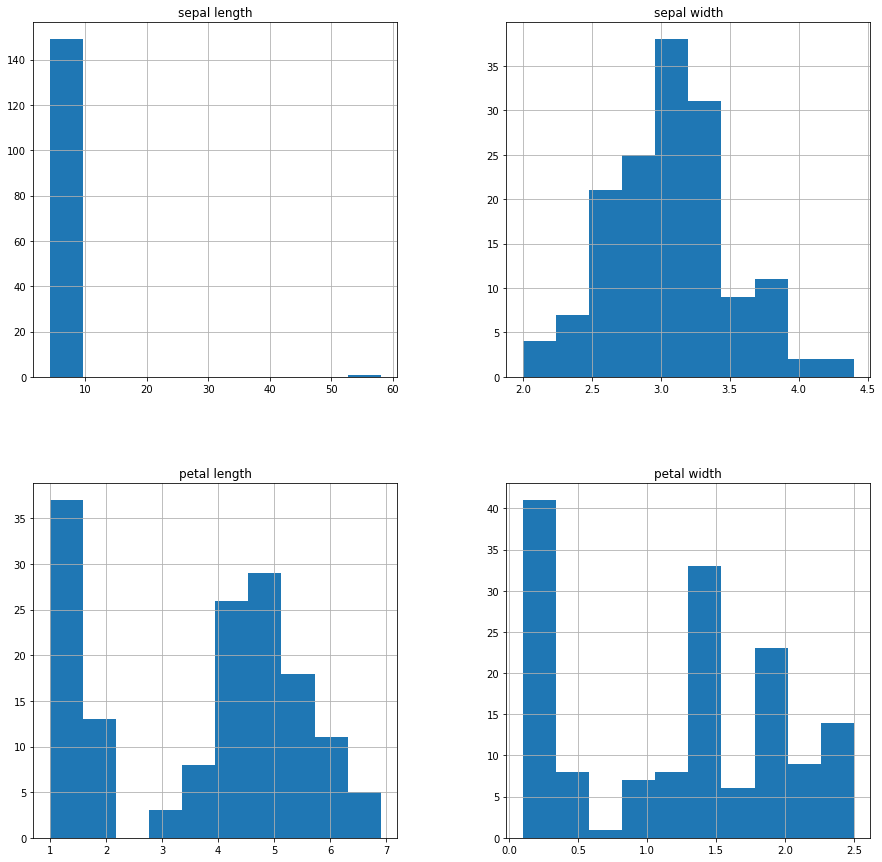

In [110]:
# Erstelle pro Feature ein Histogramm
# Im Buch Abbildung 3-3
df.hist(figsize=(15, 15))
# plt.savefig('ML_0304.png', bbox_inches='tight')

array([[<AxesSubplot:title={'center':'sepal length'}>,
        <AxesSubplot:title={'center':'sepal width'}>],
       [<AxesSubplot:title={'center':'petal length'}>,
        <AxesSubplot:title={'center':'petal width'}>]], dtype=object)

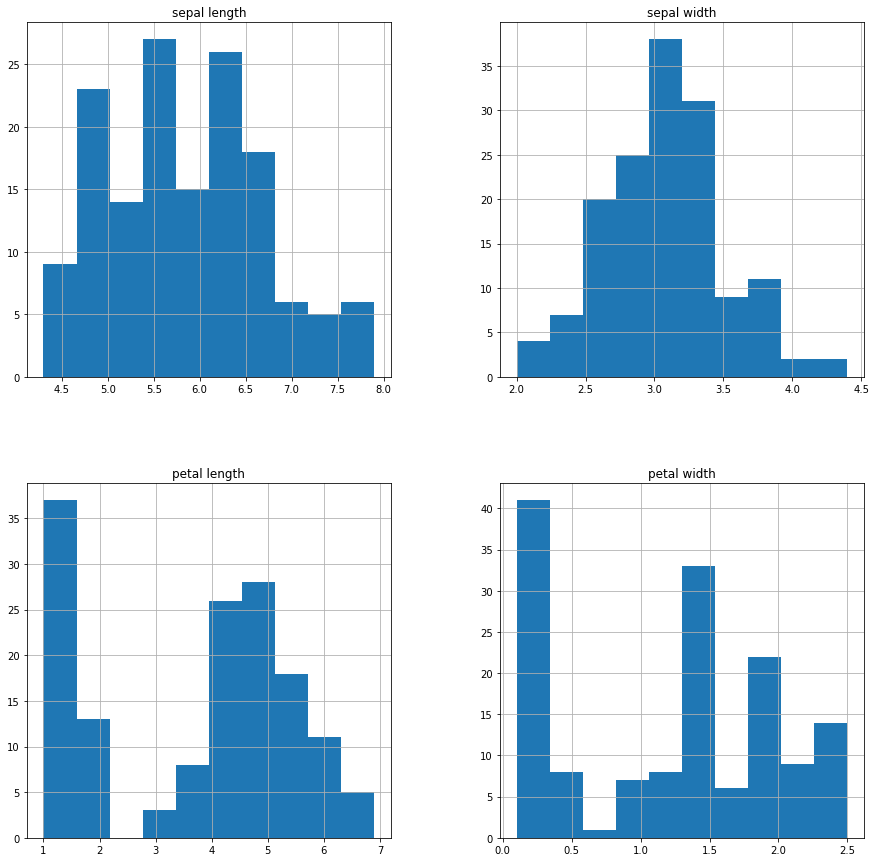

In [111]:
# Erstelle pro Feature ein Histogramm, diesmal aber ohne den Ausreißer
df.query("`sepal length` < 50").hist(figsize=(15, 15))

class
Iris-setosa        [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Iris-versicolor    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Iris-virginica     [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

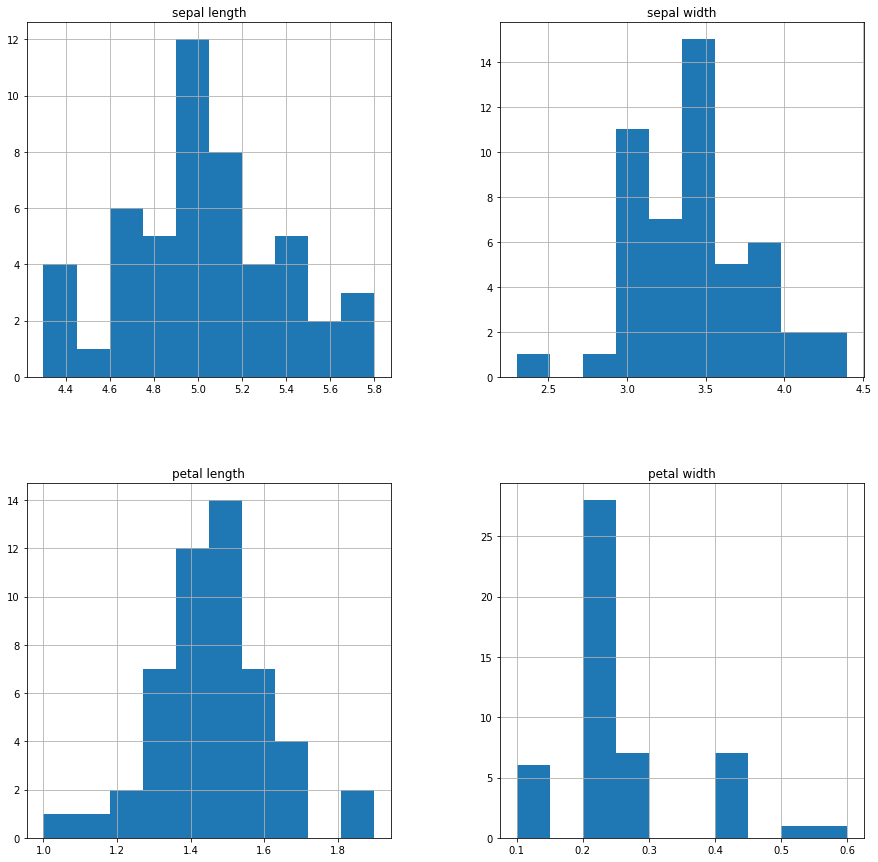

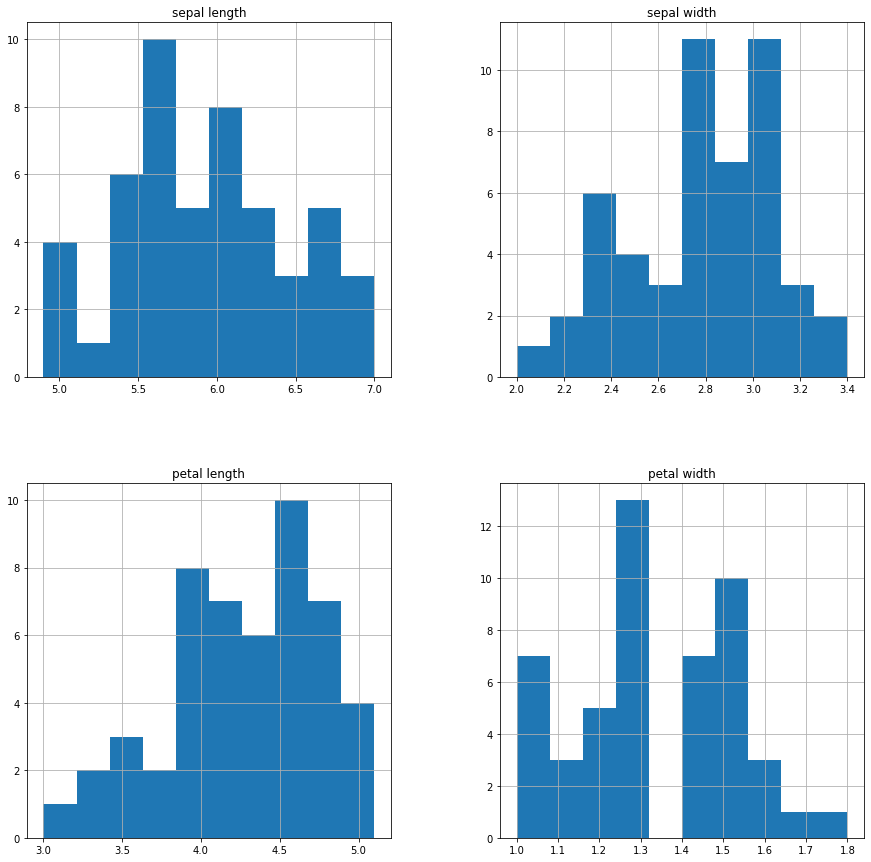

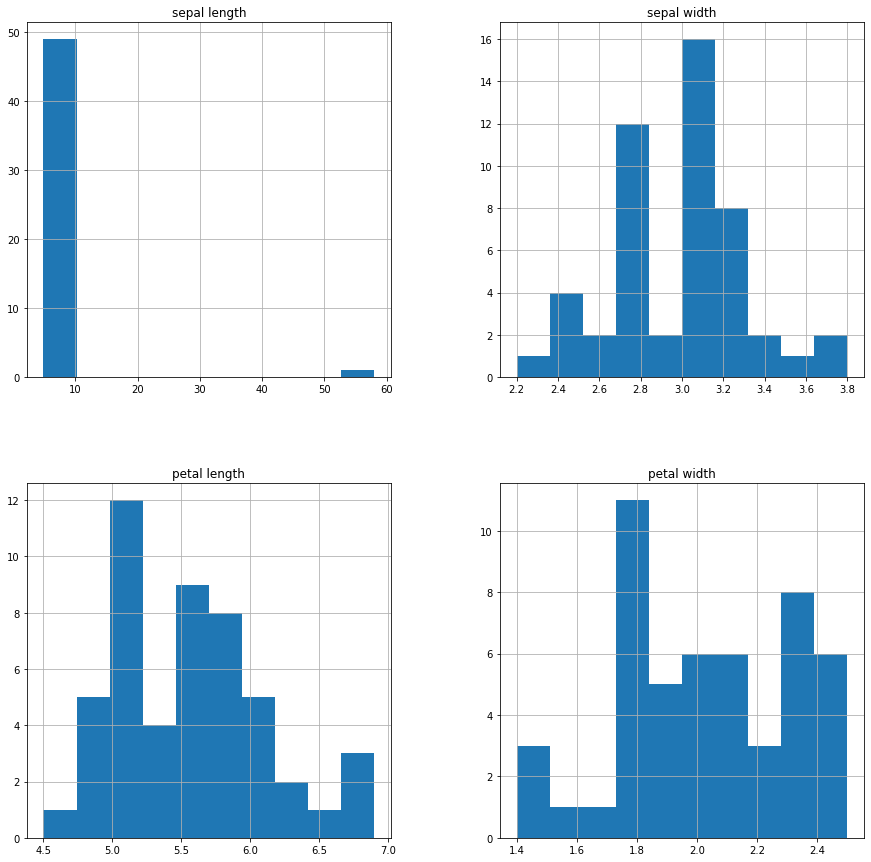

In [112]:
# Erstelle pro Klasse und Feature ein Histogramm
df.groupby("class").hist(figsize=(15,15))

In [113]:
# Selektiere den Ausreißer in sepal length
df[df['sepal length'] == 58]

,sepal length,sepal width,petal length,petal width,class
143,58.0,2.7,5.1,1.9,Iris-virginica


In [114]:
sns.jointplot?

Signature:
sns.jointplot(
    *,
    x=None,
    y=None,
    data=None,
    kind='scatter',
    color=None,
    height=6,
    ratio=5,
    space=0.2,
    dropna=False,
    xlim=None,
    ylim=None,
    marginal_ticks=False,
    joint_kws=None,
    marginal_kws=None,
    hue=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    **kwargs,
)
Docstring:
Draw a plot of two variables with bivariate and univariate graphs.

This function provides a convenient interface to the :class:`JointGrid`
class, with several canned plot kinds. This is intended to be a fairly
lightweight wrapper; if you need more flexibility, you should use
:class:`JointGrid` directly.

Parameters
----------
x, y : vectors or keys in ``data``
    Variables that specify positions on the x and y axes.
data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
    Input data structure. Either a long-form collection of vectors that can be
    assigned to named variables or a wide-form dataset 

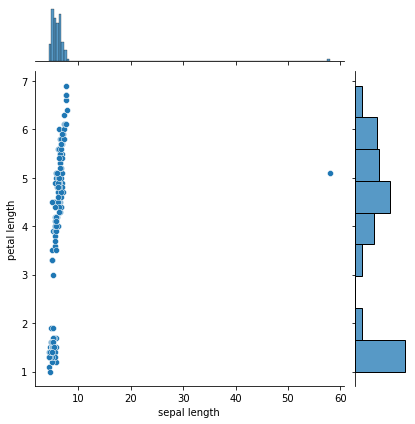

In [115]:
# Visualisiere den Zusammenhang zwischen "sepal length" und "petal length"
# Im Buch Abbildung 3-4
sns.jointplot(df['sepal length'], df['petal length'])
# plt.savefig('ML_0305.png', bbox_inches='tight')

In [116]:
# Bestimme den Korrelationskoeffizienten sowie den p-Wert für den linearen Zusammenhang
from scipy.stats.stats import pearsonr

pearsonr(df["sepal length"], df["petal length"])

(0.22778441680040584, 0.005056831506625906)

In [117]:
# Korrigiere den Ausreißer durch Verschieben des Kommas
df.loc[143, 'sepal length'] = 5.8

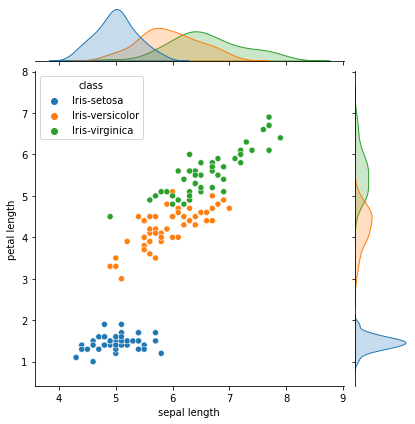

In [127]:
# p value:
# https://en.wikipedia.org/wiki/P-value
# http://www.dummies.com/education/math/statistics/what-a-p-value-tells-you-about-statistical-data/
# https://xkcd.com/1478/
# Visualisiere erneut den Zusammenhang zwischen den beiden Variablen
# Im Buch Abbildung 3-5
sns.jointplot(df['sepal length'], df['petal length'], hue=df["class"])
# plt.savefig('ML_0306.png', bbox_inches='tight')

In [119]:
# Bestimme erneut den Korrelationskoeffizienten sowie den p-Wert für den linearen Zusammenhang
from scipy.stats.stats import pearsonr

pearsonr(df["sepal length"], df["petal length"])

(0.8717541573048713, 1.0384540627941062e-47)

<AxesSubplot:>

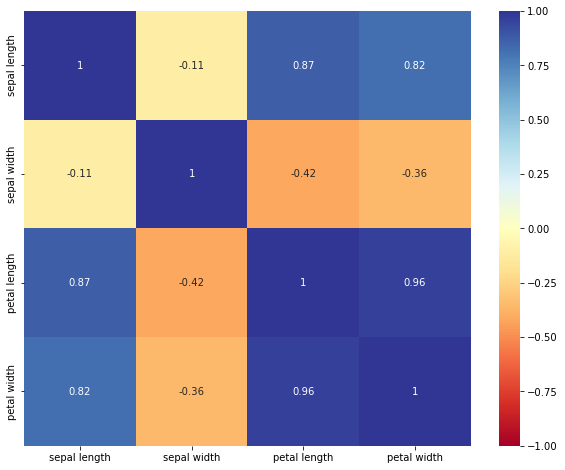

In [128]:
# Erstelle eine Korrelationsmatrix für alle Features
# https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
# Im Buch Abbildung 3-6

plt.figure(figsize=(10,8))
corrmat = df.corr()
sns.heatmap(corrmat, annot=True, cmap="RdYlBu", vmin=-1, vmax=1)
# plt.savefig('ML_0307.png', bbox_inches='tight')

In [121]:
# Speichere den bereinigten Datensatz als neue CSV ab
df.to_csv('iris_cleaned.csv', index=False, header=True)

## Bonus Level: Mehr nette Visualisierungen

Iris-setosa             AxesSubplot(0.1,0.559091;0.363636x0.340909)
Iris-versicolor    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Iris-virginica              AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

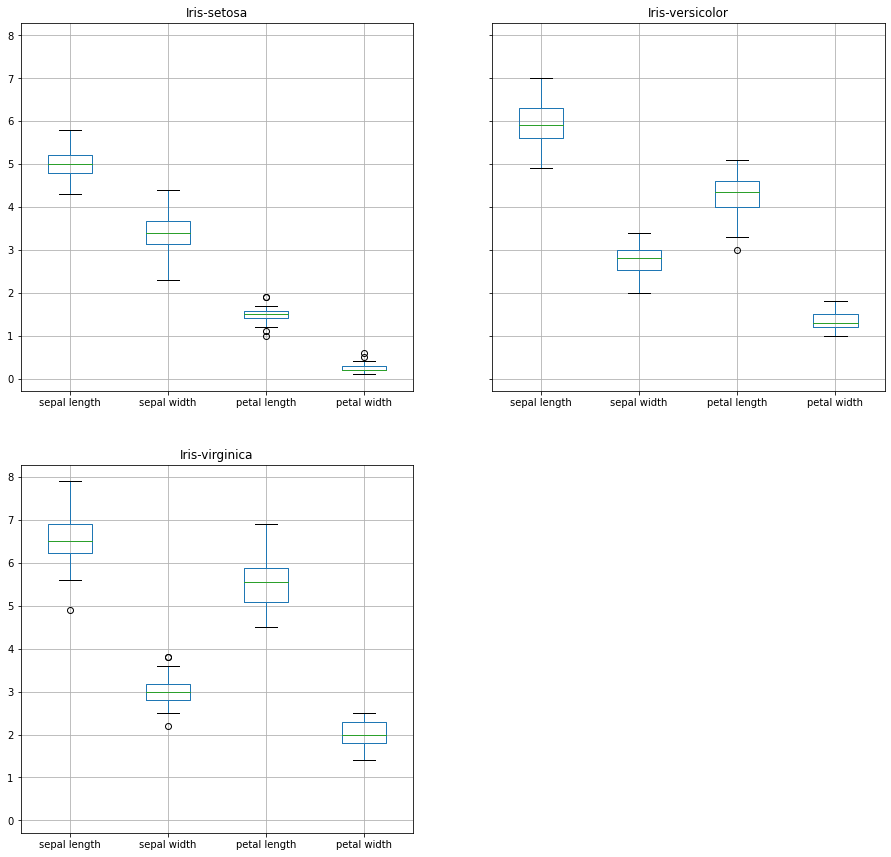

In [122]:
# Erstelle einen Boxplot für jede Klasse
df.groupby('class').boxplot(figsize=(15,15))

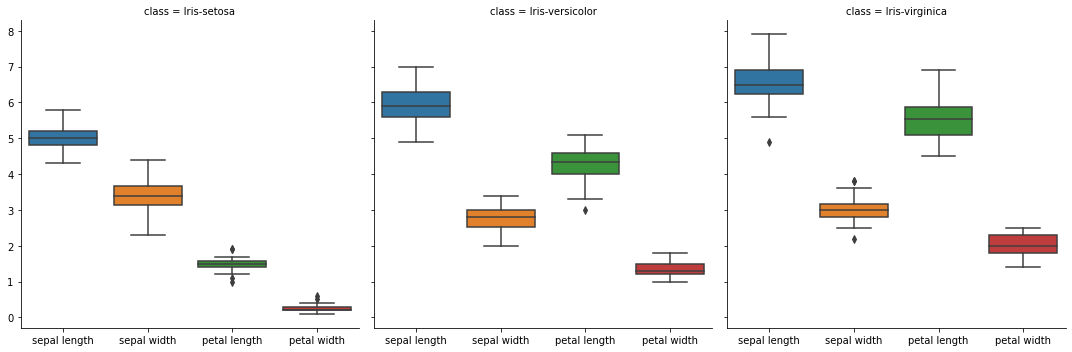

In [123]:
# mit seaborn
sns.catplot(data=df, kind="box", col="class")

<AxesSubplot:>

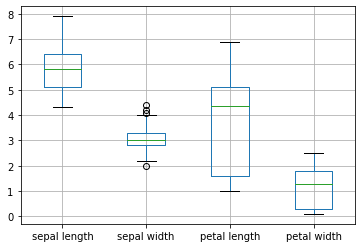

In [124]:
# Boxplot für den gesamten Datensatz
df.boxplot()

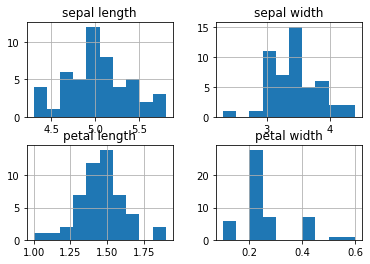

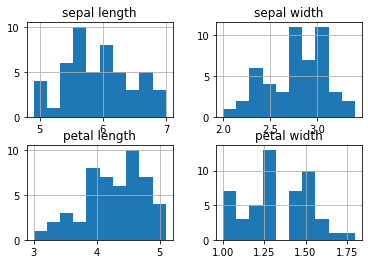

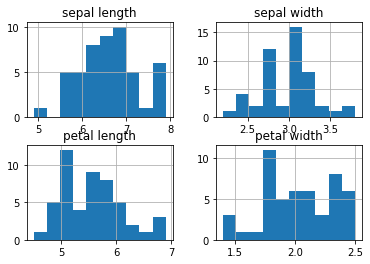

In [125]:
df.groupby('class').hist()
plt.show()

class
Iris-setosa        AxesSubplot(0.125,0.125;0.775x0.755)
Iris-versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
Iris-virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: sepal length, dtype: object

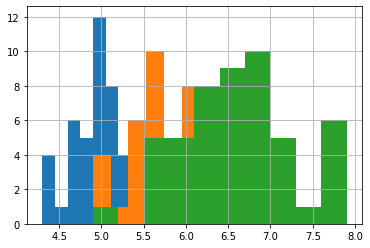

In [126]:
# Histogramm für ein Feature und für alle Klassen
df.groupby('class')['sepal length'].hist()